# 🔁 Ciclo completo de aprendizaje de una sola neurona

Veremos el **ciclo completo de aprendizaje** de una neurona:
- Propagación hacia adelante
- Cálculo del error (loss)
- Backpropagation (gradiente)
- Ajuste de pesos y bias

En este ejercicio vamos a partir de una red muy simple:  
- una sola neurona con dos entradas
- activación sigmoide
- función de pérdida MSE (error cuadrático medio)

El proceso de aprendizaje es:

1. **Propagación hacia adelante**:  
   Calculamos la salida `a` usando los pesos y la función sigmoide.

2. **Cálculo del error (pérdida)**:  
   Comparando la salida con el valor real.

3. **Backpropagation (gradientes)**:  
   Aplicamos la **regla de la cadena** para saber cómo afecta cada peso al error.

4. **Actualización**:  
   Ajustamos los pesos y el bias usando **gradiente descendente**.

Este es el paso esencial que permite que una red neuronal **aprenda**.  

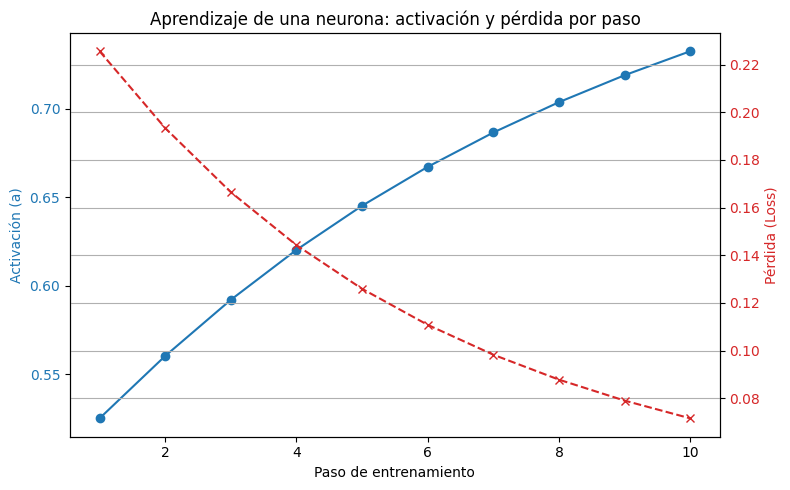

Tabla de entrenamiento paso a paso:

   Paso       z  a (salida)    Loss      w1      w2       b  grad_w1  grad_w2  \
0     1  0.1000      0.5250  0.2256  0.5000 -1.0000  0.1000  -0.4738  -0.2369   
1     2  0.2422      0.5602  0.1934  0.5474 -0.9763  0.1237  -0.4334  -0.2167   
2     3  0.3722      0.5920  0.1665  0.5907 -0.9546  0.1454  -0.3942  -0.1971   
3     4  0.4904      0.6202  0.1442  0.6301 -0.9349  0.1651  -0.3578  -0.1789   
4     5  0.5978      0.6451  0.1259  0.6659 -0.9170  0.1830  -0.3249  -0.1625   
5     6  0.6953      0.6671  0.1108  0.6984 -0.9008  0.1992  -0.2957  -0.1478   
6     7  0.7840      0.6865  0.0983  0.7280 -0.8860  0.2140  -0.2698  -0.1349   
7     8  0.8649      0.7037  0.0878  0.7550 -0.8725  0.2275  -0.2471  -0.1236   
8     9  0.9391      0.7189  0.0790  0.7797 -0.8602  0.2398  -0.2272  -0.1136   
9    10  1.0072      0.7325  0.0716  0.8024 -0.8488  0.2512  -0.2097  -0.1048   

   grad_b  
0 -0.2369  
1 -0.2167  
2 -0.1971  
3 -0.1789  
4 -0.1625  

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Parámetros iniciales ===
x = np.array([2, 1])                # Entradas
w = np.array([0.5, -1.0])           # Pesos iniciales
b = 0.1                             # Bias inicial
y_true = 1                          # Valor real (etiqueta)
lr = 0.1                            # Tasa de aprendizaje
steps = 10                          # Número de iteraciones

# === Funciones ===
sigmoid = lambda z: 1 / (1 + np.exp(-z))
mse = lambda y, a: (y - a) ** 2

# === Guardar historial de entrenamiento ===
history = []

# === Entrenamiento paso a paso ===
for step in range(steps):
    z = np.dot(x, w) + b
    a = sigmoid(z)
    loss = mse(y_true, a)

    # Gradientes
    dL_da = -2 * (y_true - a)
    da_dz = a * (1 - a)
    dL_dz = dL_da * da_dz
    dL_dw = dL_dz * x
    dL_db = dL_dz

    # Guardar datos
    history.append({
        "Paso": step + 1,
        "z": z,
        "a (salida)": a,
        "Loss": loss,
        "w1": w[0],
        "w2": w[1],
        "b": b,
        "grad_w1": dL_dw[0],
        "grad_w2": dL_dw[1],
        "grad_b": dL_db
    })

    # Actualización de pesos y bias
    w = w - lr * dL_dw
    b = b - lr * dL_db

# === Convertir historial en tabla ===
df = pd.DataFrame(history)

# === Gráfico de activación y pérdida ===
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel("Paso de entrenamiento")
ax1.set_ylabel("Activación (a)", color="tab:blue")
ax1.plot(df["Paso"], df["a (salida)"], marker='o', color="tab:blue", label="Activación")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Pérdida (Loss)", color="tab:red")
ax2.plot(df["Paso"], df["Loss"], marker='x', linestyle='--', color="tab:red", label="Loss")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Aprendizaje de una neurona: activación y pérdida por paso")
plt.grid(True)
fig.tight_layout()
plt.show()

# === Mostrar tabla final ===
print("Tabla de entrenamiento paso a paso:\n")
print(df.round(4))


# 🧠 Análisis del gráfico y la tabla de entrenamiento

### 📊 Gráfico: Activación y Pérdida paso a paso

Este gráfico muestra cómo la **neurona aprende** a lo largo de los 10 pasos de entrenamiento:

- La **línea azul** representa la **activación** \( a = \sigma(z) \), es decir, la salida de la neurona.  
  👉 Comienza en 0.525 y sube poco a poco hacia 1 (el valor real deseado).

- La **línea roja discontinua** representa la **pérdida** (Loss), es decir, el error.  
  👉 Comienza en 0.225 y **disminuye progresivamente**, lo que indica que la red está aprendiendo.

🔁 En cada paso, los **pesos y el bias se ajustan** para que la activación se acerque al valor real y el error sea menor.

---

### 📋 Tabla: Entrenamiento paso a paso

Esta tabla resume lo que ocurre **en cada iteración** del proceso de aprendizaje:

| Columna     | Significado |
|-------------|-------------|
| `Paso`      | Número de iteración (de 1 a 10) |
| `z`         | Resultado de la combinación lineal: \( z = x \cdot w + b \) |
| `a (salida)`| Activación sigmoide: \( a = \sigma(z) \), predicción de la neurona |
| `Loss`      | Error cuadrático: \( (y - a)^2 \) |
| `w1`, `w2`  | Valores de los pesos en ese paso |
| `b`         | Bias actualizado |
| `grad_w1`, `grad_w2`, `grad_b` | Gradientes: cuánto cambia cada parámetro para mejorar |

✅ Lo importante:
- Los pesos (`w1`, `w2`) y el bias (`b`) **van cambiando en cada paso**.
- Los gradientes **van disminuyendo** porque la red se va acercando al valor correcto.
- La activación se va acercando a 1, y la pérdida se va haciendo más pequeña.

---

🎯 **Conclusión:**:
> La neurona empieza con una predicción imperfecta, y a través de este proceso de ajuste mejora poco a poco hasta reducir el error y predecir mejor.

# 🎯 Actividad: Explora el aprendizaje de una neurona

Modifica distintos elementos del código y observa cómo afecta al proceso de aprendizaje.

### 🧪 1. Cambia las entradas

En la línea: x = np.array([2, 1])

Prueba con otros valores, por ejemplo: x = np.array([3, -2])

> ¿Cómo cambia la salida (a) y la pérdida (loss)?

### ⚙️ 2. Cambia los pesos iniciales

En la línea: w = np.array([0.5, -1.0])

Prueba con: w = np.array([1.0, 1.0])

> ¿El aprendizaje es más rápido o más lento?

### 🔁 3. Cambia la tasa de aprendizaje (lr)

Prueba con valores distintos:

lr = 0.01    # muy lenta

lr = 0.5     # más agresiva

> ¿Qué ocurre con la pérdida?

### 🧮 4. Aumenta el número de pasos

En: steps = 10

Pon: steps = 20

> ¿La activación se estabiliza? ¿La pérdida baja más?